In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

from sklearn.metrics import accuracy_score

#to show the plots interactively
#%matplotlib notebook

#or show plots staticly 
%matplotlib inline

#Check whether GPU is avaliable, else it will use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
print(device)

cuda


<IPython.core.display.Javascript object>


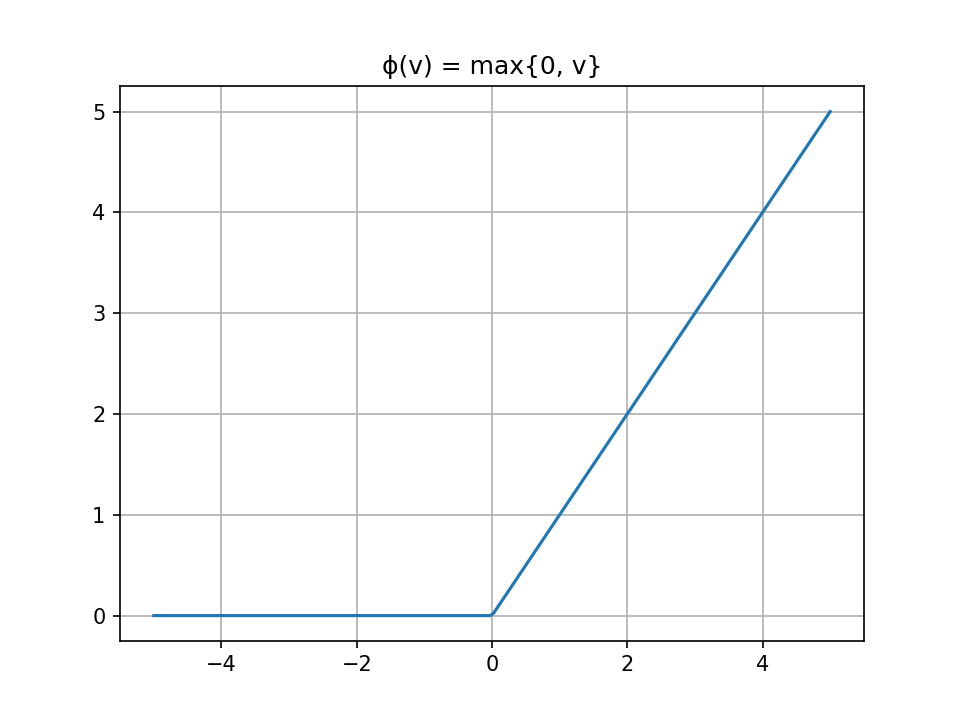

<IPython.core.display.Javascript object>


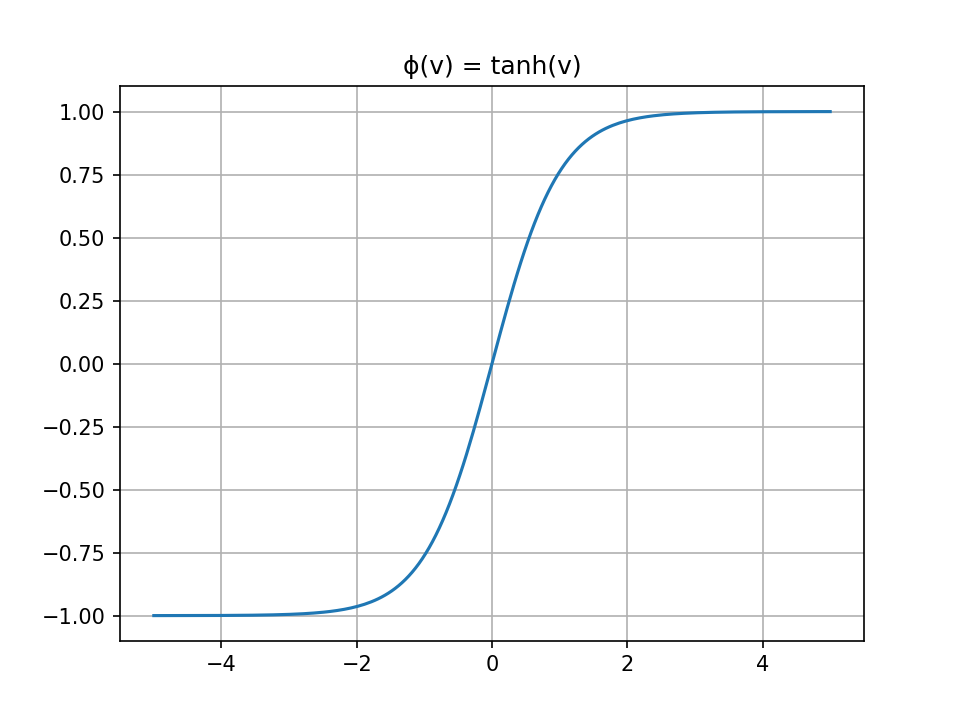

In [114]:
# Problem 3
# (a)
x_base = np.linspace(-5,5,200)

y = list(map(lambda x: 0 if x<0 else x ,x_base))
plt.figure()
plt.title('ϕ(v) = max{0, v}')
plt.grid()
#plt.xlim(-5,5)
plt.plot(x_base,y)
plt.show()

y = list(map(lambda x: np.tanh(x),x_base))
plt.figure()
plt.title('ϕ(v) = tanh(v)')
plt.grid()
#plt.xlim(-5,5)
plt.plot(x_base,y)
plt.show()


(b) There are d+1 parameters when a a single neuron has d inputs.


# Problem 4
(a)  

input from previous layer = 2, in the first hidden layer we have (2+1)*5=15 parameters

input from previous layer = 5, in the second hidden layer we have (5+1)*2=12 parameters

input from previous layer = 2, in the output layer we have (2+1)*1=3 parameters

total number of parameters = 15+12+3 = 30  

(b)  
$y(x_1, x_2) = ϕ(w_{out,0} + w_{out,1} · z_1(x_1, x_2) + w_{out,2} ·
z_2(x_1, x_2))$

where z1(x1, x2) and z2(x1, x2) are the two outputs from the second hidden layer.

$z_1(x_1, x_2) = ϕ(V_{1,0} + V_{1,1} · q_1(x_1, x_2) + V_{1,2} · q_2(x_1, x_2) + V_{1,3} · q_3(x_1, x_2) + V_{1,4} · q_4(x_1, x_2) + V_{1,5} · q_5(x_1, x_2))$ 

$z_2(x_1, x_2) = ϕ(V_{2,0} + V_{2,1} · q_1(x_1, x_2) + V_{2,2} · q_2(x_1, x_2) + V_{2,3} · q_3(x_1, x_2) + V_{2,4} · q_4(x_1, x_2) + V_{2,5} · q_5(x_1, x_2))$ 

where $q_n(x_1, x_2)$ are the nth output from the first hidden layer.

$q_1(x_1, x_2) = ϕ(U_{1,0} + U_{1,1} · x_1 + U_{1,2} ·
x_2)$

$q_2(x_1, x_2) = ϕ(U_{2,0} + U_{2,1} · x_1 + U_{2,2} ·
x_2)$

$q_3(x_1, x_2) = ϕ(U_{3,0} + U_{3,1} · x_1 + U_{3,2} ·
x_2)$

$q_4(x_1, x_2) = ϕ(U_{4,0} + U_{4,1} · x_1 + U_{4,2} ·
x_2)$

$q_5(x_1, x_2) = ϕ(U_{5,0} + U_{5,1} · x_1 + U_{5,2} ·
x_2)$

Substitute all equations into the first equation, we can get

$y(x_1, x_2) = ϕ(w_{out,0} + w_{out,1} · ϕ(V_{1,0} + V_{1,1} · ϕ(U_{1,0} + U_{1,1} · x_1 + U_{1,2} ·
x_2) + V_{1,2} · ϕ(U_{2,0} + U_{2,1} · x_1 + U_{2,2} ·
x_2) + V_{1,3} · ϕ(U_{3,0} + U_{3,1} · x_1 + U_{3,2} ·
x_2) + V_{1,4} · ϕ(U_{4,0} + U_{4,1} · x_1 + U_{4,2} ·
x_2) + V_{1,5} · ϕ(U_{5,0} + U_{5,1} · x_1 + U_{5,2} ·
x_2)) + w_{out,2} ·
ϕ(V_{2,0} + V_{2,1} · ϕ(U_{1,0} + U_{1,1} · x_1 + U_{1,2} ·
x_2) + V_{2,2} · ϕ(U_{2,0} + U_{2,1} · x_1 + U_{2,2} ·
x_2) + V_{2,3} · ϕ(U_{3,0} + U_{3,1} · x_1 + U_{3,2} ·
x_2) + V_{2,4} · ϕ(U_{4,0} + U_{4,1} · x_1 + U_{4,2} ·
x_2) + V_{2,5} · ϕ(U_{5,0} + U_{5,1} · x_1 + U_{5,2} ·
x_2)))$



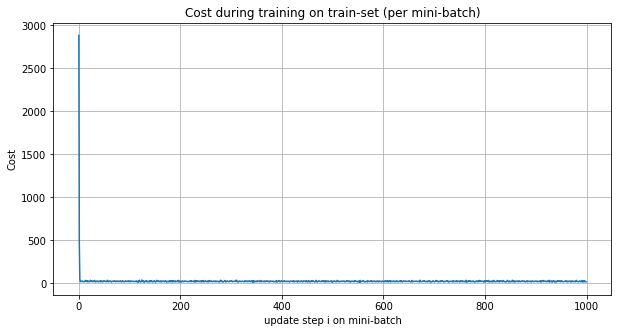

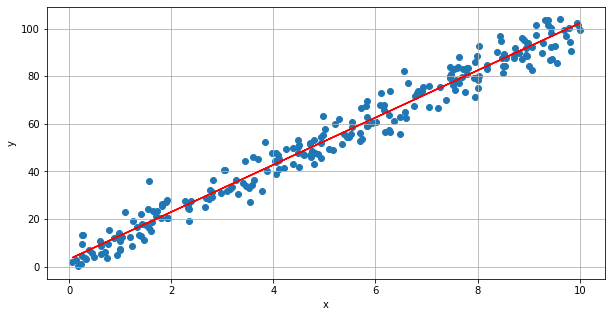

('0.weight', Parameter containing:
tensor([[9.9174]], requires_grad=True))
('0.bias', Parameter containing:
tensor([3.0908], requires_grad=True))


In [39]:
# Task A synthesized dataset

a_true = 10.0 # choose your own value here
b_true = 3.0 # choose your own value here
sigma_epsilon = 5.0 #choose your own noise level here

X = np.random.uniform(0, 10, 250) # sample a bunch of #x_n in [0,10]
y_obs = a_true*X + b_true + sigma_epsilon*np.random.randn(len(X)) # linear relationship embedded in zero mean additive gaussian noise

X = torch.tensor(X).reshape(len(X),1).float() # comment about each row being a data-pair
y_obs = torch.tensor(y_obs).reshape(len(y_obs),1).float()

my_dataset = TensorDataset(X,y_obs)
my_dataloader = DataLoader(my_dataset,batch_size=50, shuffle=True)

cost_function = nn.MSELoss()
#cost_function = nn.L1Loss()
#cost_function = nn.CrossEntropyLoss

model = nn.Sequential(nn.Linear(in_features=1, out_features=1))

optim = torch.optim.SGD(model.parameters(), lr=0.01 )#

training_minibatch_Js =[]
nr_epochs = 200
for epoch_i in range(nr_epochs):
    for X_batch, y_batch in my_dataloader:
        # tensor object where each 'row' (first index of tensor) corresponds to a single data-point
        y_preds = model(X_batch)        
        cost = cost_function(y_preds, y_batch)# Compute cost
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        training_minibatch_Js.append(cost)
        optim.step() # take one update step for all model params

#Plotting cost  
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()
plt.show()

#Plotting real datasets and prediction 

with torch.no_grad():
    y_preds = model(X)
    
plt.figure(figsize=[10,5])
#X = X.detach().numpy()
#y_preds = y_preds.detach().numpy()
plt.scatter(X,y_obs)
plt.plot(X,y_preds,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# Print all parameters in your neural network model
for p in model.named_parameters():
    print(p)

print(f'cost of last step:{training_minibatch_Js[-1]}')


<IPython.core.display.Javascript object>


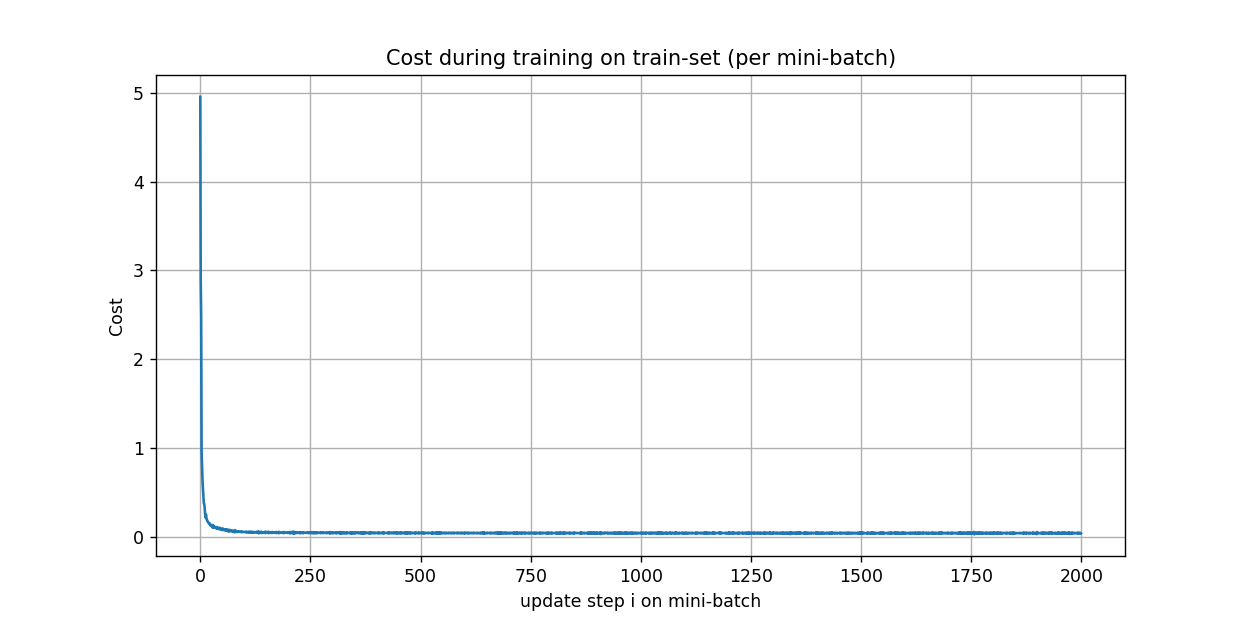

<IPython.core.display.Javascript object>


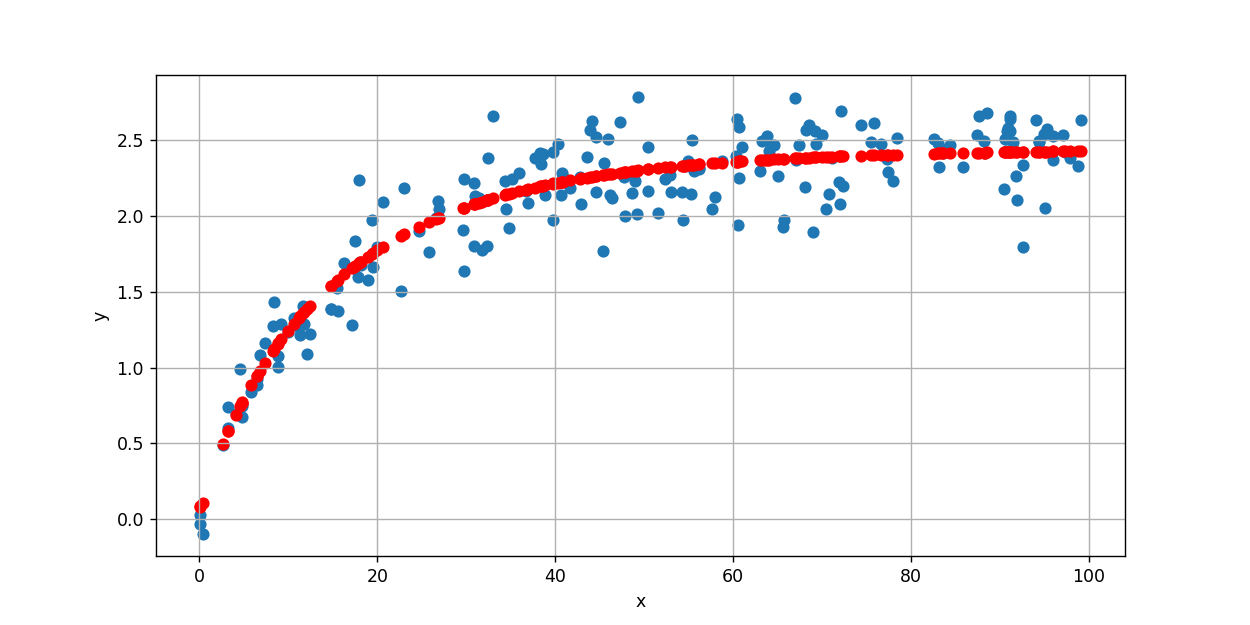

cost of last step:0.036969687789678574


In [134]:
# Task A MarvinMinsky dataset

my_data = np.genfromtxt('dataset_Marvin_Minsky.csv', delimiter=',', skip_header=1)
X = my_data[:,0] # sample a bunch of #x_n in [0,10]
y_obs = my_data[:,1] 

batch_size = 100
#print(len(X))
#print(len(y_obs))

# Move X,y_obs to device(GPU or CPU)
X = torch.tensor(X).reshape(len(X),1).float().to(device)
y_obs = torch.tensor(y_obs).reshape(len(y_obs),1).float().to(device)

my_dataset = TensorDataset(X,y_obs)
my_dataloader = DataLoader(my_dataset,batch_size=batch_size, shuffle=True)

cost_function = nn.MSELoss()
#cost_function = nn.L1Loss()
#cost_function = nn.CrossEntropyLoss

model = nn.Sequential(
    nn.Linear(in_features=1, out_features=20),
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=5),
    nn.Tanh(),
    nn.Linear(in_features=5, out_features=1),
).to(device)

optim = torch.optim.SGD(model.parameters(), lr=0.01 )

training_minibatch_Js =[]
nr_epochs = 1000
for epoch_i in range(nr_epochs):
    for X_batch, y_batch in my_dataloader:
        # tensor object where each 'row' (first index of tensor) corresponds to a single data-point
        y_preds = model(X_batch).to(device)
        cost = cost_function(y_preds, y_batch).to(device)# Compute cost
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        training_minibatch_Js.append(cost)
        optim.step() # take one update step for all model params

#Plotting cost  
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()
plt.show()

#print(X)

#Plotting real datasets and prediction 

with torch.no_grad():
    y_preds = model(X).cpu().numpy()
    X = X.cpu().numpy() #fetch X,y_obs from GPU to RAM and transform them into nparray.
    y_obs = y_obs.cpu().numpy()
    
plt.figure(figsize=[10,5])

plt.scatter(X,y_obs,label='dataset')
plt.scatter(X,y_preds,color='r',label='fitted ANN')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
print(f'cost of last step:{training_minibatch_Js[-1]}')

# Print all parameters in your neural network model
#for p in model.named_parameters():
#    print(p)

torch.Size([1000, 2])
torch.Size([1000, 1])


<IPython.core.display.Javascript object>


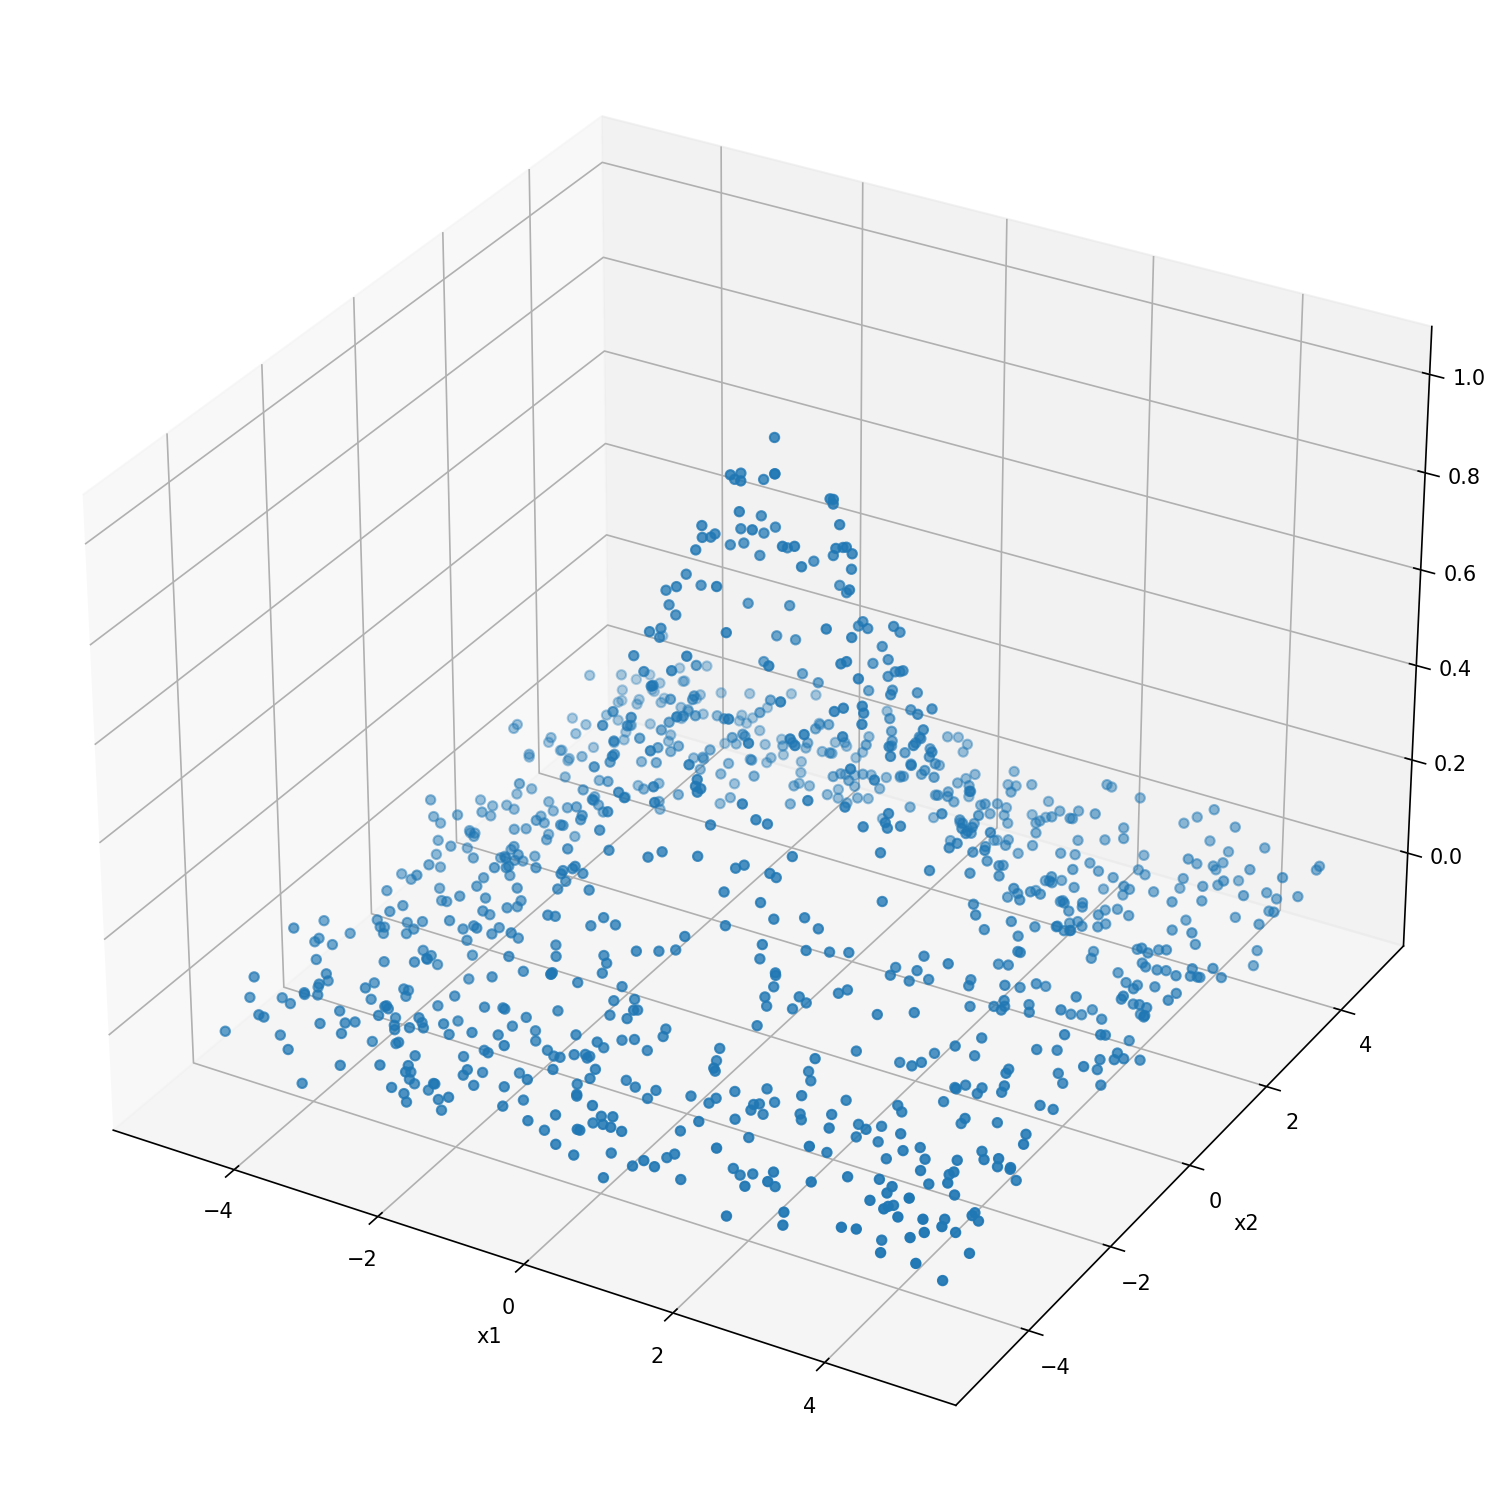

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


Text(0.5, 0, 'x2')

In [120]:
# Task B bell curve (a)

from mpl_toolkits.mplot3d import Axes3D

N = 1000 # Nr of data-points to sample and generate
x = 10*torch.rand(size=[N,2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y = torch.zeros(N).reshape(-1,1)
for i in range(len(x)):
    y[i] = torch.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + 0.04*torch.randn(1)
    
print(np.shape(x))
print(np.shape(y))

# Plotting
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [158]:
# Task b (f) creating a test set to validate the model

N = 10000 # Nr of data-points to sample and generate
xt = 10*torch.rand(size=[N,2]) - 5 #x_test
mean_true = torch.tensor([0.0, 0.0])
yt = torch.zeros(N).reshape(-1,1) #y_test
for i in range(len(xt)):
    yt[i] = torch.exp(-((xt[i,:]-mean_true).T@(xt[i,:]-mean_true))/4) + 0.04*torch.randn(1)

In [159]:
# Task B bell curve
# Define a more generalized function for training, to reuse the code
def task_b_train(**kwargs):
    batch_size = kwargs['batch_size']
    # Move x,y to device(GPU or CPU)
    x = kwargs['x'].float().to(device)
    y = kwargs['y'].float().to(device)

    xt = kwargs['xt'].float().to(device)
    yt = kwargs['yt'].float().to(device)    
    
    my_dataset = TensorDataset(x,y)
    my_dataloader = DataLoader(my_dataset,batch_size=batch_size, shuffle=True)

    test_dataset = TensorDataset(xt,yt)    
    test_dataloader = DataLoader(test_dataset,batch_size=len(xt), shuffle=False)
    
    cost_function = nn.MSELoss()

    model = kwargs['model'].to(device)

    optim = torch.optim.SGD(model.parameters(), lr=kwargs['lr'] )

    training_minibatch_Js =[]
    nr_epochs = kwargs['nr_epochs']
    for epoch_i in range(nr_epochs):
        for x_batch, y_batch in my_dataloader:
            y_preds = model(x_batch).to(device)
            cost = cost_function(y_preds, y_batch).to(device)# Compute cost
            optim.zero_grad() # zero the grads of all model params
            cost.backward() # compute J gradient of all model params
            training_minibatch_Js.append(cost)
            optim.step() # take one update step for all model params

    #Plotting cost  
    plt.figure(figsize=[10,5])
    plt.plot(training_minibatch_Js)
    plt.xlabel('update step i on mini-batch')
    plt.ylabel('Cost')
    plt.title('Cost during training on train-set (per mini-batch)')
    plt.grid()
    plt.show()

    #print(X)

    #Plotting real datasets and prediction 
    x1 = torch.linspace(start=-5, end=5, steps=100)
    x2 = torch.linspace(start=-5, end=5, steps=100)
    X, Y = torch.meshgrid(x1, x2)

    s = torch.stack([X.ravel(), Y.ravel()]).T.to(device) # all grid coordinates for region.

    with torch.no_grad():
        y_preds = model(s).cpu().numpy() # making predictions on surface grid to get surface values.
        x = x.cpu().numpy() #fetch x,y,s from GPU to CPU and transform them into nparray.
        y = y.cpu().numpy()
        s = s.cpu().numpy()
        
        for xt_batch, yt_batch in my_dataloader:   #Actually here is only 1 batch containing all test data
            yt_preds = model(xt_batch)
            cost_test = cost_function(yt_preds, yt_batch).cpu().numpy() # Compute cost        

    # 3D surface plotting
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    ax = Axes3D(fig)

    ax.scatter(s[:,0], s[:,1], y_preds, label='Fitted FANN') #
    ax.scatter(x[:,0], x[:,1], y, label='datapoints') # plotting data points
    ax.legend()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    print(f'cost of last step:{training_minibatch_Js[-1]}')
    print(f'cost of test data:{cost_test}')   

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


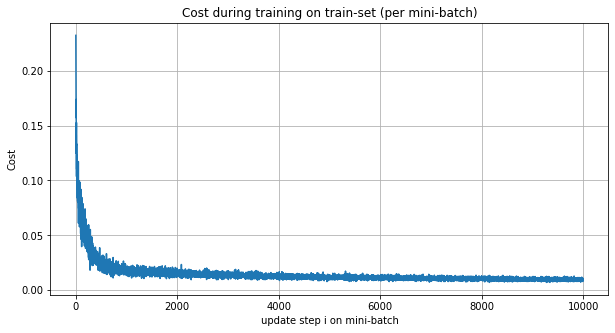

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


cost of last step:0.009709388948976994
cost of test data:0.009585877880454063


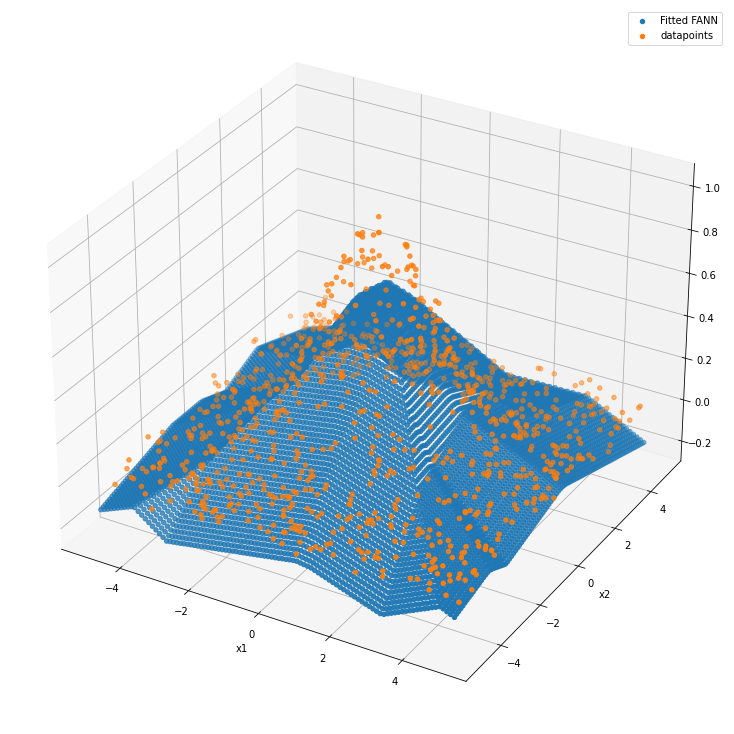

In [161]:
task_b_train(
x = torch.tensor(x),
y = torch.tensor(y),
xt = torch.tensor(xt),
yt = torch.tensor(yt),
    
batch_size = 200,
nr_epochs = 2000,
lr = 0.01,
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),    
    nn.Linear(in_features=10, out_features=1),
))

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


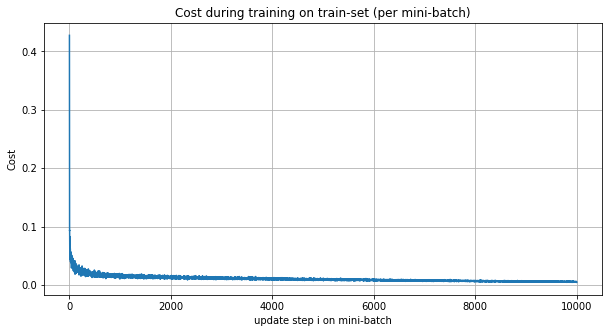

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


cost of last step:0.004307560157030821
cost of test data:0.005158334970474243


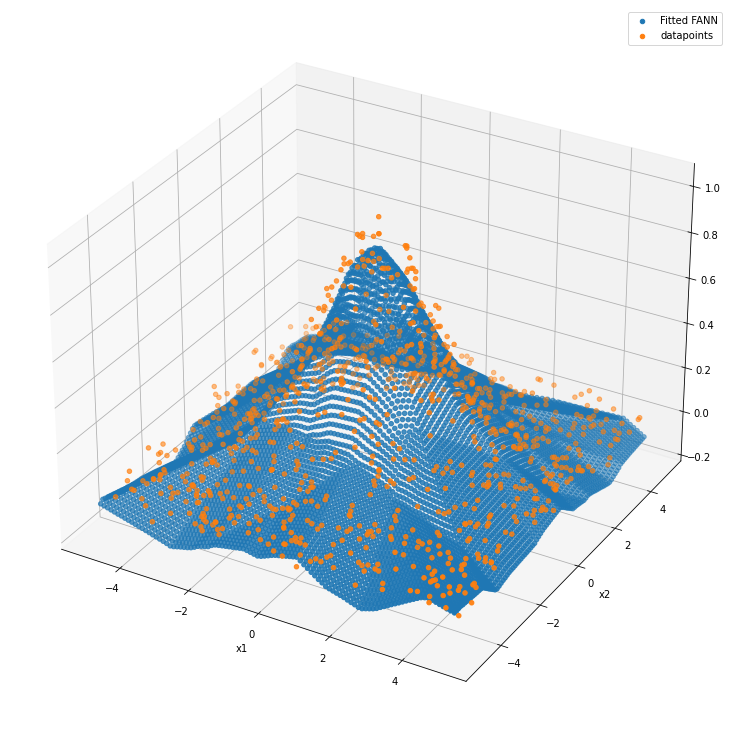

In [162]:
task_b_train(
x = torch.tensor(x),
y = torch.tensor(y),
xt = torch.tensor(xt),
yt = torch.tensor(yt),    
    
batch_size = 200,
nr_epochs = 2000,
lr = 0.01,
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=50),
    nn.ReLU(),    
    nn.Linear(in_features=50, out_features=1),
))

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


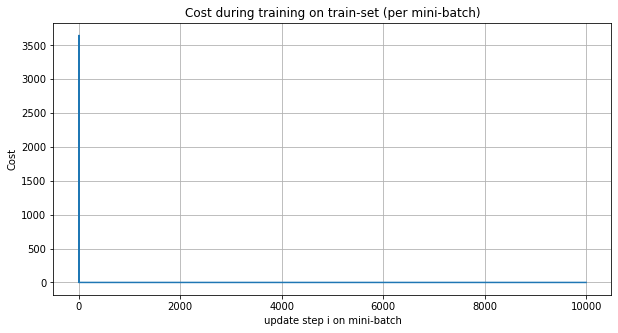

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


cost of last step:0.0035766668152064085
cost of test data:0.0029606998432427645


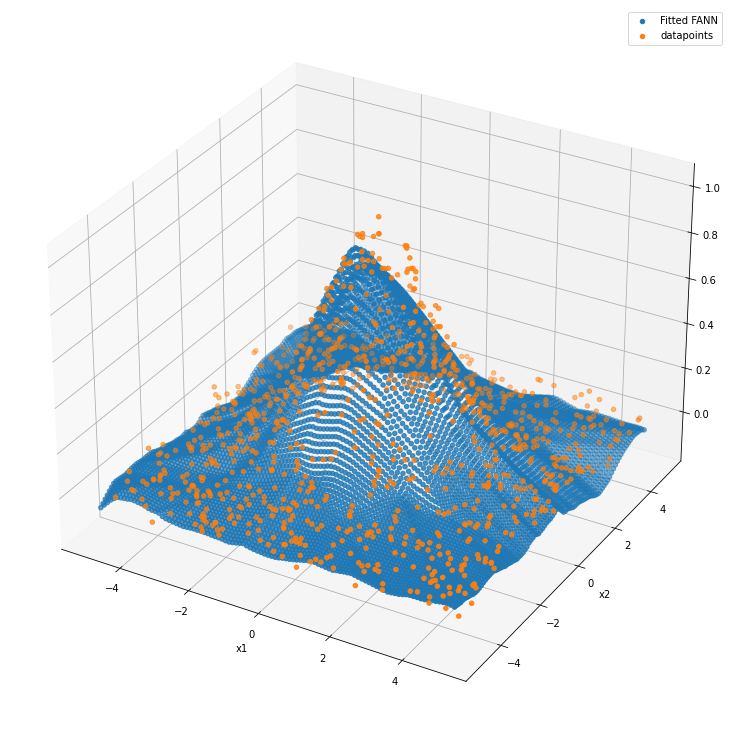

In [163]:
task_b_train(
x = torch.tensor(x),
y = torch.tensor(y),
xt = torch.tensor(xt),
yt = torch.tensor(yt),    
    
batch_size = 200,
nr_epochs = 2000,
lr = 0.01,
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=300),
    nn.ReLU(),    
    nn.Linear(in_features=300, out_features=1),
))

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


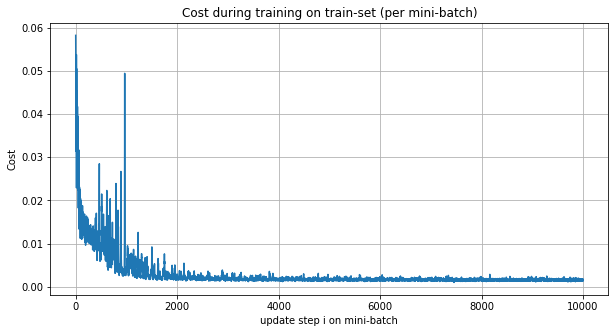

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


cost of last step:0.001396753592416644
cost of test data:0.001618834096007049


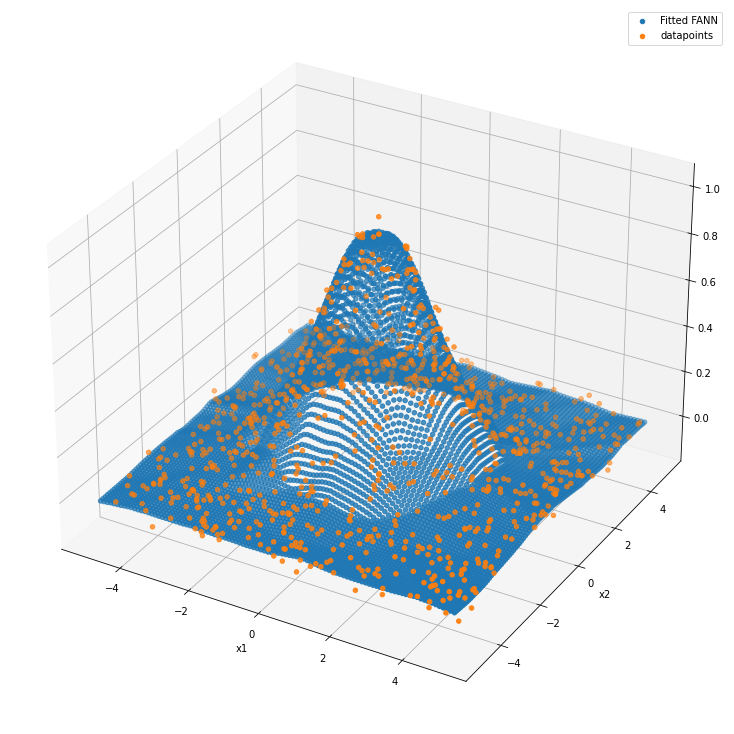

In [164]:
task_b_train(
x = torch.tensor(x),
y = torch.tensor(y),
xt = torch.tensor(xt),
yt = torch.tensor(yt),
    
batch_size = 200,
nr_epochs = 2000,
lr = 0.1,
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=100),
    nn.ReLU(),    
    nn.Linear(in_features=100, out_features=20),
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=5),
    nn.ReLU(),
    nn.Linear(in_features=5, out_features=1),
))

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


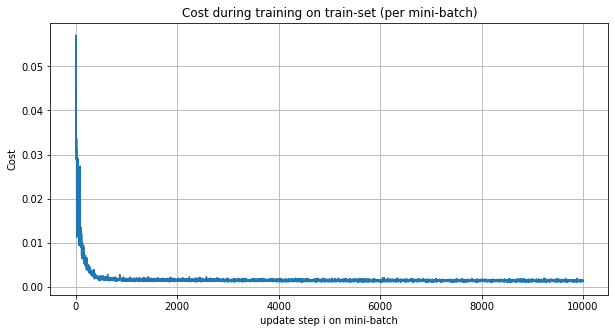

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


cost of last step:0.001321815187111497
cost of test data:0.0016703472938388586


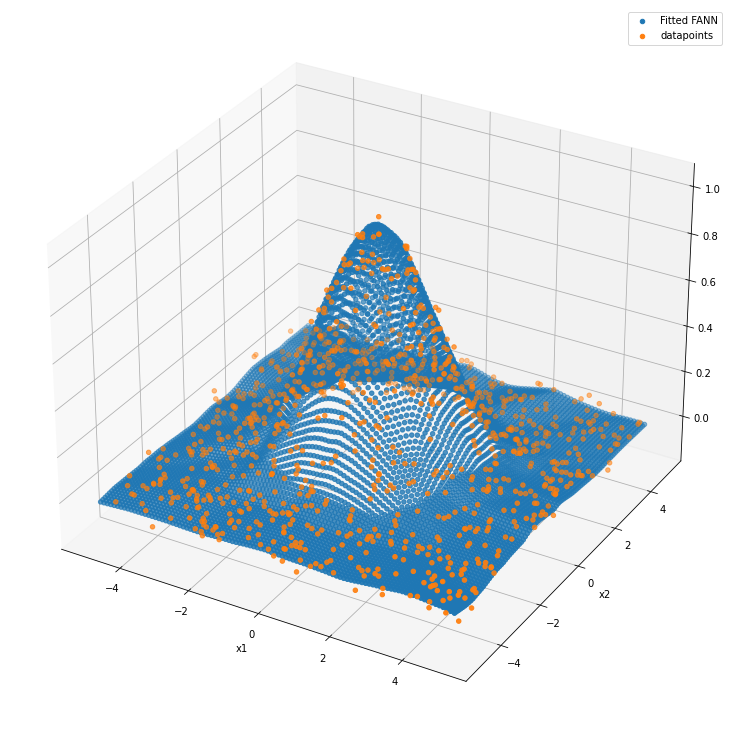

In [166]:
task_b_train(
x = torch.tensor(x),
y = torch.tensor(y),
xt = torch.tensor(xt),
yt = torch.tensor(yt),
    
batch_size = 200,
nr_epochs = 2000,
lr = 0.1,
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=300),
    nn.ReLU(),    
    nn.Linear(in_features=300, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=20),
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=1),
))

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
c:\program files (x86)\microsoft visu

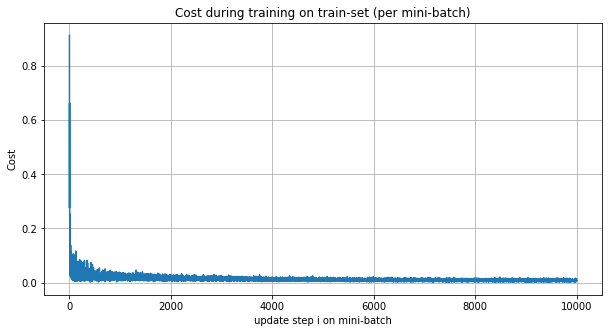

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.

cost of last step:0.007622902747243643
cost of test data:0.004779075738042593


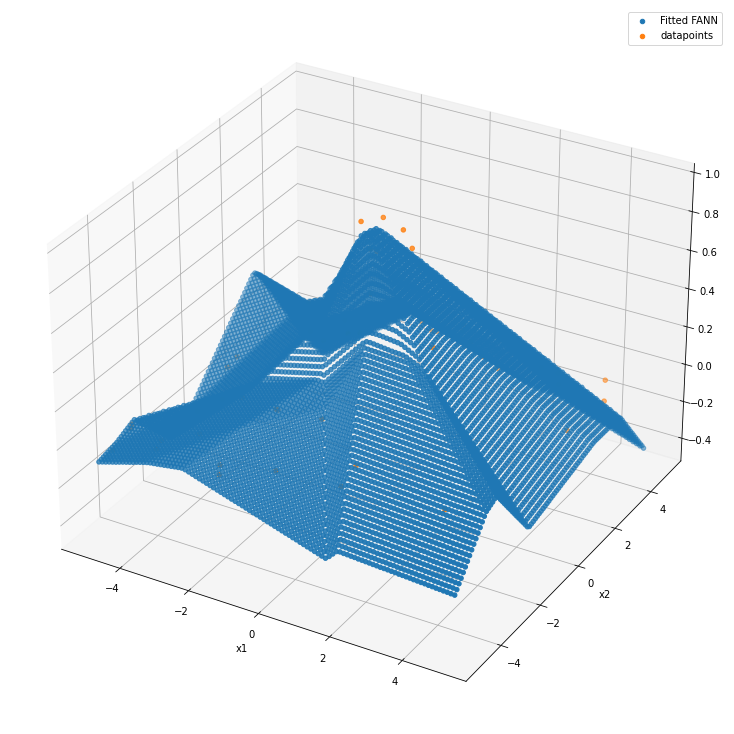

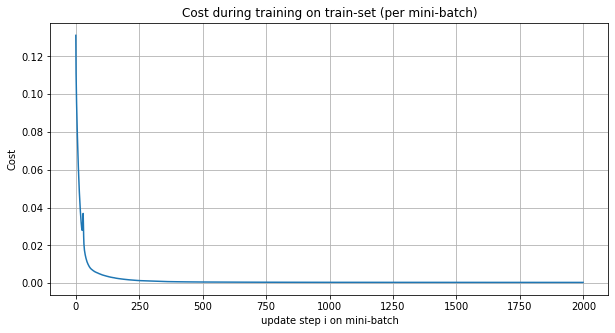

cost of last step:0.0004407654341775924
cost of test data:0.00043853154056705534


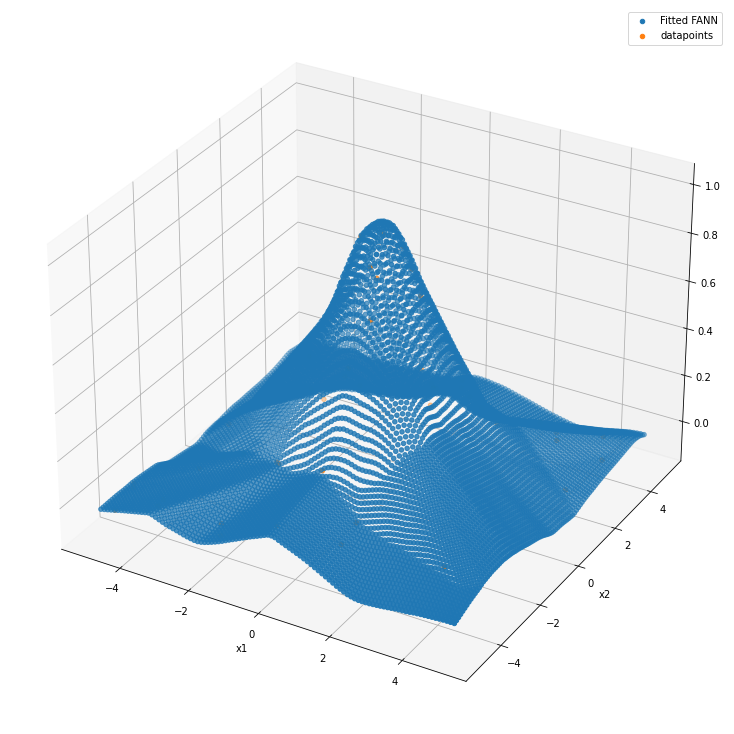

In [167]:
# Task B (g) training on a small dataset

N = 50 # Nr of data-points to sample and generate
x = 10*torch.rand(size=[N,2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y = torch.zeros(N).reshape(-1,1)
for i in range(len(x)):
    y[i] = torch.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + 0.04*torch.randn(1)

#train on the smallest networks   
task_b_train(
x = torch.tensor(x),
y = torch.tensor(y),
xt = torch.tensor(xt),
yt = torch.tensor(yt),
    
batch_size = 10,
nr_epochs = 2000,
lr = 0.01,
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),    
    nn.Linear(in_features=10, out_features=1),
))

#train on the largest networks
task_b_train(
x = torch.tensor(x),
y = torch.tensor(y),
xt = torch.tensor(xt),
yt = torch.tensor(yt),
    
batch_size = 200,
nr_epochs = 2000,
lr = 0.1,
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=300),
    nn.ReLU(),    
    nn.Linear(in_features=300, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=20),
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=1),
))

In [2]:
import assignment_ann as a4
og_data = a4.SignalDataset() # Provides back a PyTorch Dataset
size_of_og_data = len(og_data) # Print size of whole dataset

In [170]:
print(size_of_og_data)

1384


In [174]:
print(len(og_data[0][0]))

500


<Figure size 720x360 with 0 Axes>

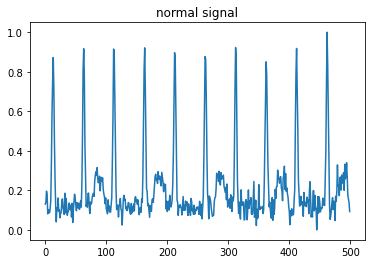

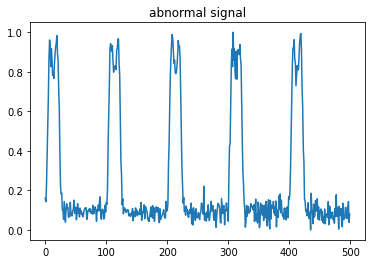

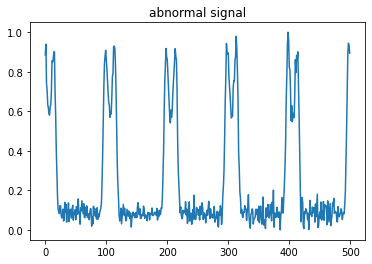

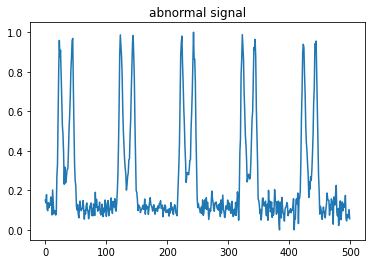

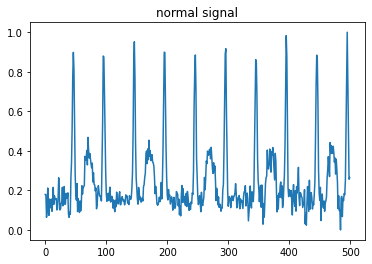

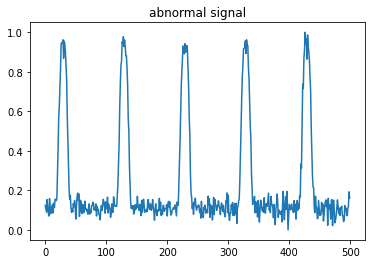

In [178]:
plt.figure(figsize=[10,5])
for i in range(6):
    if og_data[i][1] == 0: data_label_str = 'normal'
    else: data_label_str = 'abnormal'
    plt.figure()
    plt.plot(og_data[i][0])
    plt.title(f'{data_label_str} signal')
    plt.show()

Epoch:0 - Train cost:0.7111314535140991,- Train acc:0.34710743801652894
Epoch:0 - Val cost:0.7128775715827942,- Val acc:0.3333333333333333
..............
Epoch:10 - Train cost:0.6307331919670105,- Train acc:0.6528925619834711
Epoch:10 - Val cost:0.6241104006767273,- Val acc:0.6666666666666666
..............
Epoch:20 - Train cost:0.5639601945877075,- Train acc:0.6528925619834711
Epoch:20 - Val cost:0.5643338561058044,- Val acc:0.6666666666666666
..............
Epoch:30 - Train cost:0.24066689610481262,- Train acc:0.9276859504132231
Epoch:30 - Val cost:0.25941506028175354,- Val acc:0.8586956521739131
..............
Epoch:40 - Train cost:0.04402858391404152,- Train acc:0.9989669421487604
Epoch:40 - Val cost:0.06928454339504242,- Val acc:0.9891304347826086
..............
Epoch:50 - Train cost:0.014266464859247208,- Train acc:1.0
Epoch:50 - Val cost:0.044816214591264725,- Val acc:0.9927536231884058
..............
Epoch:60 - Train cost:0.0075627644546329975,- Train acc:1.0
Epoch:60 - Val cos

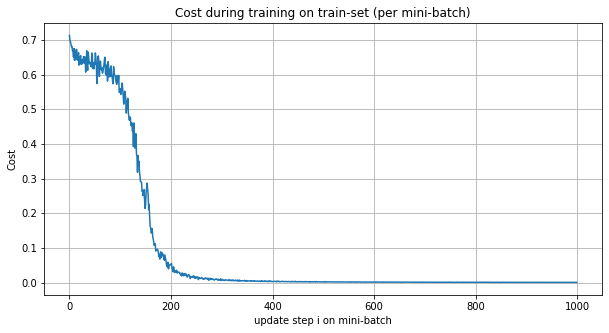

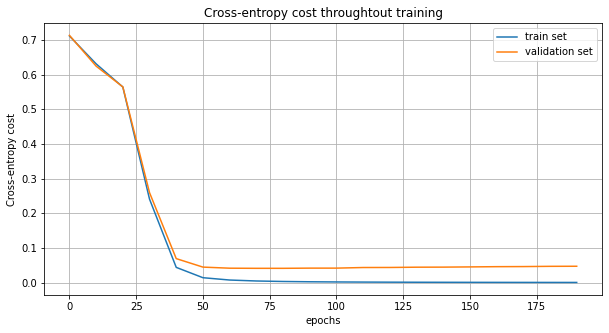

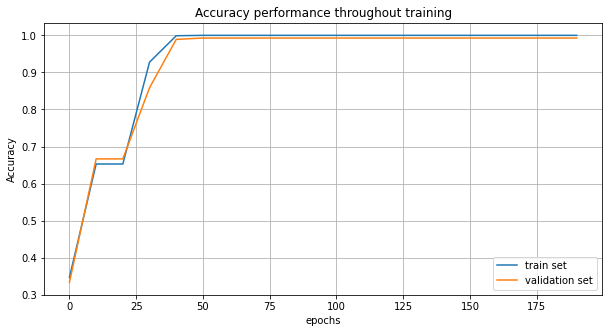

cost of last step:0.00046373007353395224


In [24]:
import ANN # a .py file that I wrote
# Start training
ANN.task_c_train(og_data,
train_fraction =0.7,
val_fraction = 0.2,
eval_every_kth = 10,
batch_size = 200,
nr_epochs = 200,
lr = 0.1,
model = nn.Sequential(
    nn.Linear(in_features=500, out_features=300),
    nn.ReLU(),    
    nn.Linear(in_features=300, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=50),
    nn.ReLU(),
    nn.Linear(in_features=50, out_features=2),
))

In [3]:
#Task D FashionMNIST
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets

from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
root="data",
train=True,
download=True,
transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
root="data",
train=False,
download=True,
transform=ToTensor(),
)



In [30]:
print(training_data[0][0].size())
print(training_data[0][1].size())

torch.Size([1, 28, 28])


AttributeError: 'int' object has no attribute 'size'

Epoch:0 - Train cost:2.3035221099853516,- Train acc:0.13127083333333334
Epoch:0 - Val cost:2.303528070449829,- Val acc:0.12791666666666668
..............
Epoch:10 - Train cost:0.36878007650375366,- Train acc:0.8667291666666667
Epoch:10 - Val cost:0.38622522354125977,- Val acc:0.8593333333333333
..............
Epoch:20 - Train cost:0.30287352204322815,- Train acc:0.8883958333333334
Epoch:20 - Val cost:0.3563649356365204,- Val acc:0.8695833333333334
..............
Epoch:30 - Train cost:0.3020472526550293,- Train acc:0.88625
Epoch:30 - Val cost:0.39183714985847473,- Val acc:0.8631666666666666
..............
Epoch:40 - Train cost:0.19722233712673187,- Train acc:0.9280625
Epoch:40 - Val cost:0.31091877818107605,- Val acc:0.88975
..............
Epoch:50 - Train cost:0.202707439661026,- Train acc:0.9235416666666667
Epoch:50 - Val cost:0.36153560876846313,- Val acc:0.8789166666666667
..............
Epoch:60 - Train cost:0.18222609162330627,- Train acc:0.9301666666666667
Epoch:60 - Val cost:0.3

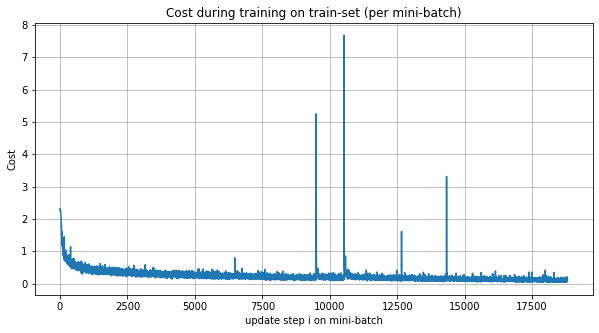

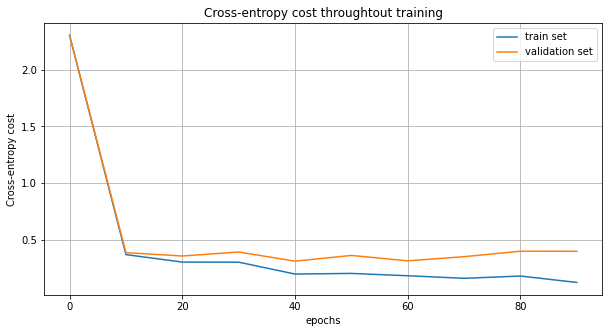

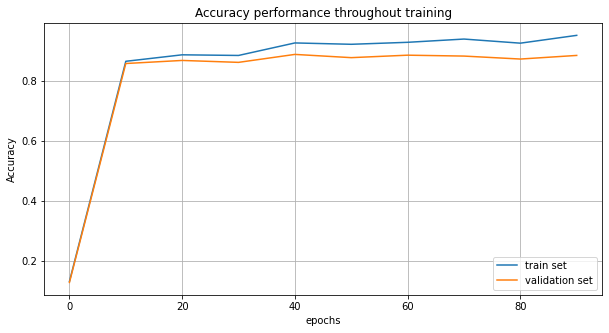

cost of last step:0.15403541922569275


In [3]:
import ANN # a .py file that I wrote
# Start training
ANN.task_c_train(training_data,
external_test_data = test_data,
train_fraction =0.8,
val_fraction = 0.2,
eval_every_kth = 10,
batch_size = 256,
nr_epochs = 100,
lr = 0.1,
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=300),
    nn.ReLU(),    
    nn.Linear(in_features=300, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=50),
    nn.ReLU(),
    nn.Linear(in_features=50, out_features=10),
))

Epoch:0 - Train cost:2.300605058670044,- Train acc:0.19675
Epoch:0 - Val cost:2.300057888031006,- Val acc:0.20266666666666666
..............
Epoch:10 - Train cost:0.45529690384864807,- Train acc:0.8261041666666666
Epoch:10 - Val cost:0.46382832527160645,- Val acc:0.8245833333333333
..............
Epoch:20 - Train cost:0.36964720487594604,- Train acc:0.8580208333333333
Epoch:20 - Val cost:0.38382992148399353,- Val acc:0.8540833333333333
..............
Epoch:30 - Train cost:0.31877022981643677,- Train acc:0.8796875
Epoch:30 - Val cost:0.3370109796524048,- Val acc:0.8743333333333333
..............
Epoch:40 - Train cost:0.28580376505851746,- Train acc:0.8928333333333334
Epoch:40 - Val cost:0.31325021386146545,- Val acc:0.8821666666666667
..............
Epoch:50 - Train cost:0.2831742763519287,- Train acc:0.8921875
Epoch:50 - Val cost:0.3107306957244873,- Val acc:0.8846666666666667
..............
Epoch:60 - Train cost:0.262722373008728,- Train acc:0.8992916666666667
Epoch:60 - Val cost:0.30

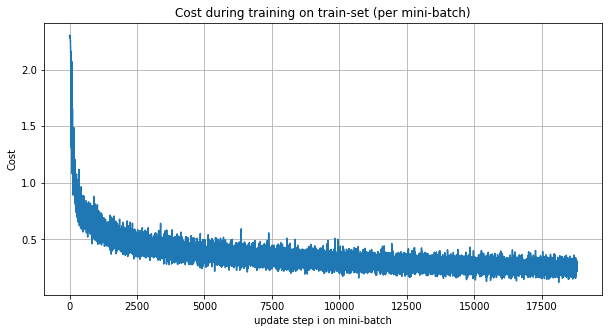

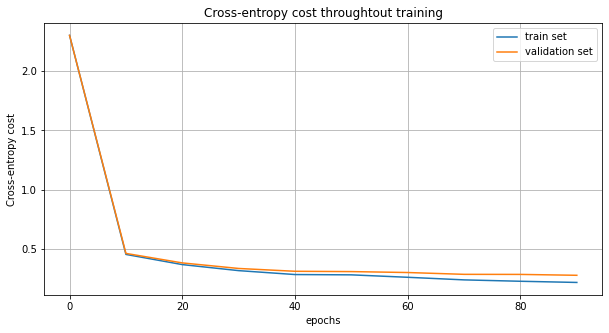

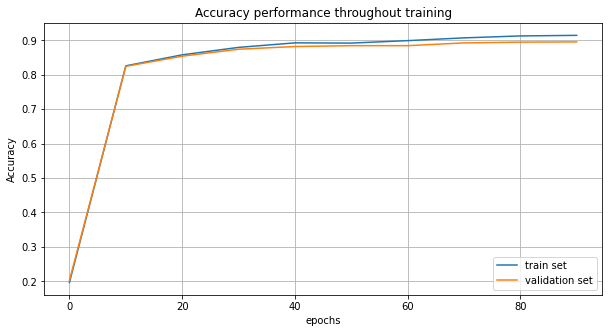

cost of last step:0.2647530436515808


In [10]:
# Task E CNN
import ANN # a .py file that I wrote
from torch.nn import functional as F
# Start training
ANN.task_c_train(training_data,
external_test_data = test_data,
train_fraction =0.8,
val_fraction = 0.2,
eval_every_kth = 10,
batch_size = 256,
nr_epochs = 100,
lr = 0.1,
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
    nn.ReLU(),    
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
    nn.ReLU(),
    nn.AvgPool2d(2,stride=2),
    nn.Flatten(),
    nn.Linear(in_features=400, out_features=120),
    nn.Dropout(p=0.5),
    nn.ReLU(),
    nn.Linear(in_features=120, out_features=84),
    nn.ReLU(),
    nn.Linear(in_features=84, out_features=10),
))